<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS909 Regression Exercise
(Fayyaz Minhas)

The objective of this exercise is to enable you to do regression with sklearn models. Please use the accompanying lecture slides for conceptural information. 

## Ordinary Least Squares Regression (OLS)

Please try to understand the simple code for OLS given below and relate it to the concepts covere din the class.

This is a simple implementation of OLS as covered in the class. Please try to understand what individual lines in the code are doing.

Text(0.5, 1.0, 'Regression Scatter Plot')

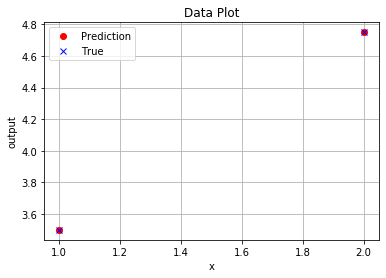

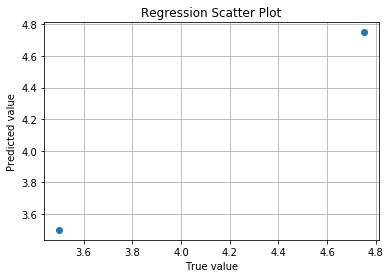

In [0]:
import numpy as np
import matplotlib.pyplot as plt
X0 = np.array([[1],[2]])
y =np.array([3.5,4.75])
X = np.hstack((X0,np.ones((X.shape[0],1)))) #append 1 to each example
w = np.linalg.pinv(X)@y
f = X@w
e = f-y
L = e@e
plt.figure();plt.plot(X0,f,'ro');plt.plot(X0,y,'bx');plt.grid();plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);plt.title('Data Plot')
plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')


Please answer the following questions:
0. Can you see a linear relationship between the input and output variables for the given data?
1. What is the pseudo inverse? What is the pseudo inverse of the given Matrix?
2. What does the model predict for an example with a feature value of 1.4?
3. How do the model's predictions change when you add another example (say, 1.6) with a feature value (say, 4.6)?

### OLS using sklearn

The code below uses sk-learn for OLS over the same data as above. Please try to understand the role of fit_intercept in the code below and answer the following questions:

1. Are your weights from sklearn OLS the same as you got above?
2. What is the role of fit_intercept? 
3. Generate a prediction for a new example using the trained model.

[1.25 2.25]
[1.25]


Text(0.5, 1.0, 'Regression Scatter Plot')

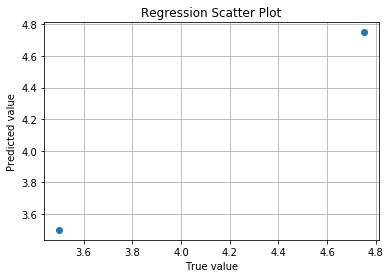

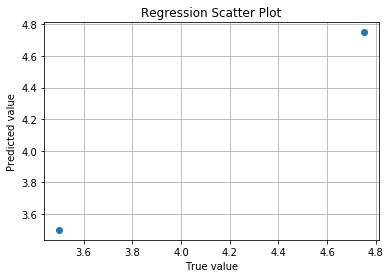

In [0]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept = False).fit(X, y)
f = regr.predict(X)
print('Weights:',regr.coef_)

plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

# No need to append 1 to feature vector using below
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept = True).fit(X0, y)
f = regr.predict(X0)
print('Weights:',regr.coef_)
plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')


## Ridge Regression

Ridge regression is OLS but with a regularizer. In the code below, we will be using both OLS and Ridge Regression for a simple task and try to understand the differences between the two. Here, we train both OLS and Ridge regression over a very small dataset but after adding noise to the example features to test the noise robustness of both models. Please go through the code and try to understand it.

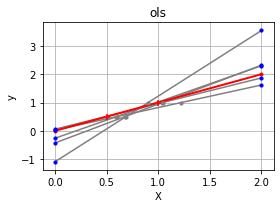

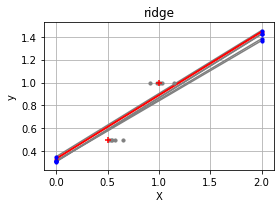

In [34]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
X_train = np.c_[.5, 1].T #train features
y_train = [.5, 1] #labels
X_test = np.c_[0, 2].T #test features

np.random.seed(0)
regressors = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1) )
for name, regr in regressors.items(): # pick a regressor at a time
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(5): # do 5 runs
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train # adding random noise to training data
        regr.fit(this_X, y_train) #training on noisy data
        ax.scatter(this_X, y_train, s=10, c='gray', marker='o', zorder=10)#plot noisy data with target
        ax.plot(X_test, regr.predict(X_test), color='gray') # testing and plotting on test data as a line
        ax.scatter(X_test, regr.predict(X_test), s=10, c='blue', marker='o', zorder=10)#plot noisy data with target
        

    regr.fit(X_train, y_train) # training on non-noisy data       
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10) #show training examples in red
    ax.plot(X_test, regr.predict(X_test), marker = '.',linewidth=2, color='red') #plotting test predictions as a line with the non-noisy data predictor

    ax.set_title(name)
    #ax.set_xlim(-0.2, 2.5)
    #ax.set_ylim((-0.2, 1.7))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()
    plt.grid()
plt.show()

We do multiple runs in training the two methods with different noise added to the training examples and then plot the results for a simple test data. Answer the following questions:
1. Do you see that each time the OLS is trained, it fits the training examples perfectly? 
2. Do you see that each time the OLS is trained with added noise, it fits a very different line as it fits the training examples perfectly? You can view the weight vectors of the fitted model after each training to understand this better as well.
3. Do you see that the line you get when OLS is trained without added noise is significantly different from the lines you get with added noise?
4. Do you see that each time the Ridge regression model is trained, it DOES NOT fit the training examples perfectly? You can view the weight vectors of the fitted model to understand this better as well.
5. Do you see that each time the ridge regression is trained with added noise, it fits a somewhat similar line?
6. Do you see that the line you get when ridge regression is trained without added noise is closer to the lines you get with added noise in comparison to the OLS model?
7. Which model is more impacted by added noise?
8. Try to understand the impact of regularization by changing the alpha hyper-parameter of the ridge regression model.

## Support Vector Regression

You can build a very simple SVR model in sklearn as follows.

Text(0.5, 1.0, 'Regression Scatter Plot')

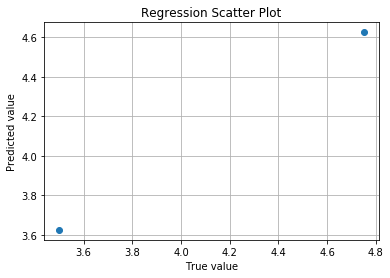

In [39]:
from sklearn.svm import SVR
regr = SVR(kernel = 'linear', C=1.0)
X0 = np.array([[1],[2]])
y =np.array([3.5,4.75])
regr.fit(X0,y)
f = regr.predict(X0)
plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

# Practical Exercise

In the exercise below, we will try to predict house prices based on some features using the Boston dataset. We can try different models for this task.

Can you find which model works best? Can you calculate some performance metrics (https://scikit-learn.org/stable/modules/model_evaluation.html) for the test set? (see class notes for more details).

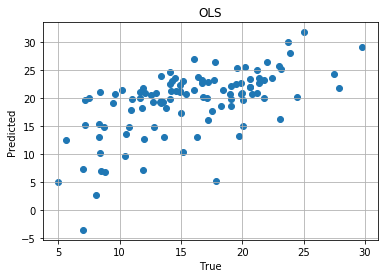

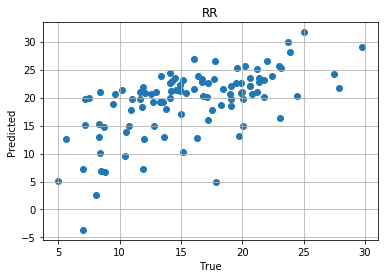

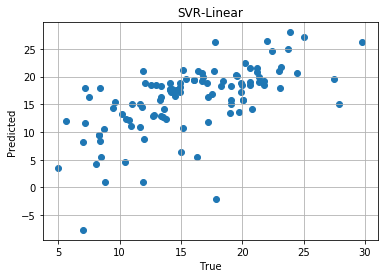

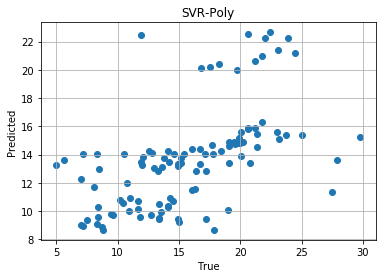

In [59]:
import matplotlib.pyplot as plt

from sklearn import datasets
# Loading some example data
X, y = datasets.load_boston(return_X_y=True)
Ntr = 400
Xtr,ytr = X[:Ntr],y[:Ntr]
Xtt,ytt = X[Ntr:],y[Ntr:]
# Training classifiers
reg1 = linear_model.LinearRegression().fit(Xtr, ytr)
reg2 = linear_model.Ridge(alpha=.1).fit(Xtr, ytr)
reg3 = SVR(kernel='linear', C= 1.0).fit(Xtr, ytr)
reg4 = SVR(kernel='poly', degree = 1, C= 10.0).fit(Xtr, ytr)

plt.figure(); plt.scatter(ytt,reg1.predict(Xtt)); plt.xlabel('True');plt.ylabel('Predicted');plt.grid();plt.title('OLS')
plt.figure(); plt.scatter(ytt,reg2.predict(Xtt)); plt.xlabel('True');plt.ylabel('Predicted');plt.grid();plt.title('RR')
plt.figure(); plt.scatter(ytt,reg3.predict(Xtt)); plt.xlabel('True');plt.ylabel('Predicted');plt.grid();plt.title('SVR-Linear')
plt.figure(); plt.scatter(ytt,reg4.predict(Xtt)); plt.xlabel('True');plt.ylabel('Predicted');plt.grid();plt.title('SVR-Poly')
plt.show()